# Weight Decay

Now that we have characterized the problem of overfitting 
and motivated the need for capacity control,
we can begin discussing some of the popular techniques
used to these ends in practice.
Recall that we can always mitigate overfitting 
by going out and collecting more training data,
that can be costly and time consuming,
typically making it impossible in the short run.
For now, let's assume that we have already obtained 
as much high-quality data as our resources permit
and focus on techniques aimed at limiting the capacity 
of the function classes under consideration. 

In our toy example, 
we saw that we could control the complexity of a polynomial 
by adjusting its degree. 
However, most of machine learning 
does not consist of polynomial curve fitting.
And moreover, even when we focus on polynomial regression,
when we deal with high-dimensional data,
manipulating model capacity by tweaking the degree $d$ is problematic.
To see why, note that for multivariate data
we must generalize the concept of polynomials 
to include *monomials*, which are simply
products of powers of variables.
For example, $x_1^2 x_2$, and $x_3 x_5^2$ are both monomials of degree $3$.
The number of such terms with a given degree $d$
blows up as a function of the degree $d$.

Concretely, for vectors of dimensionality $D$,
the number of monomials of a given degree $d$ is ${D -1 + d} \choose {D-1}$.
Hence, a small change in degree, even from say $1$ to $2$ or $2$ to $3$ 
would entail a massive blowup in the complexity of our model.
Thus, tweaking the degree is too blunt a hammer.
Instead, we need a more fine-grained tool 
for adjusting function complexity.

## Squared Norm Regularization

*Weight decay* (commonly called *L2* regularization), 
might be the most widely-used technique 
for regularizing parametric machine learning models.
The basic intuition behind weight decay is 
the notion that among all functions $f$, 
the function $f = 0$ is the simplest. 
Intuitively, we can then measure functions by their proximity to zero. 
But how precisely should we measure
the distance between a function and zero? 
There is no single right answer.
In fact, entire branches of mathematics, 
e.g. in functional analysis and the theory of Banach spaces
are devoted to answering this issue.

For our present purposes, a very simple interpretation will suffice:
We will consider a linear function 
$f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x}$ 
to be simple if its weight vector is small. 
We can measure this via $||mathbf{w}||^2$. 
One way of keeping the weight vector small 
is to add its norm as a penalty term 
to the problem of minimizing the loss. 
Thus we replace our original objective, 
*minimize the prediction error on the training labels*,
with new objective,
*minimize the sum of the prediction error and the penalty term*.
Now, if the weight vector becomes too large, 
our learning algorithm will find more profit in
minimizing the norm $|| \mathbf{w} ||^2$ 
versus minimizing the training error. 
That's exactly what we want. 
To illustrate things in code, let's revive our previous example
from our chapter on [Linear Regression](linear-regression.ipynb). 
There, our loss was given by

$$l(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

Recall that $\mathbf{x}^{(i)}$ are the observations, 
$y^{(i)}$ are labels, and $(\mathbf{w}, b)$ 
are the weight and bias parameters respectively. 
To arrive at a new loss function 
that penalizes the size of the weight vector, 
we need to add $||mathbf{w}||^2$, but how much should we add? 
To address this, we need to add a new hyperparameter,
that we will call the *regularization constant* and denote by $\lambda$:

$$l(\mathbf{w}, b) + \frac{\lambda}{2} \|\boldsymbol{w}\|^2$$

This non-negatice parameter $\lambda \geq 0$ 
governs the amount of regularization. 
For $\lambda = 0$, we recover our original loss function, 
whereas for $\lambda > 0$ we ensure that $\mathbf{w}$ cannot grow too large. The astute reader might wonder why we are squaring 
the norm of the weight vector. 
We do this for two reasons.
First, we do it for computational convenience.
By squaring the L2 norm, we remove the square root,
leaving the sum of squares of each component of the weight vector.
This is convenient because it is easy to compute derivatives of a sum of terms (the sum of derivatives equals the derivative of the sum). 

Moreover, you might ask, why the L2 norm in the first place and not the L1 norm, or some other distance function.
In fact, several other choices are valid 
and are popular throughout statistics.
While L2-regularized linear models constitute 
the classic *ridge regression* algorithm
L1-regularizaed linear regression 
is a similarly fundamental model in statistics 
popularly known as *lasso regression*.

One mathematical reason for working with the L2 norm and not some other norm,
is that it penalizes large components of the weight vector
much more than it penalizes small ones. 
This encourages our learning algorithm to discover models 
which distribute their weight across a larger number of features,
which might make them more robust in practice 
since they do not depend precariously on a single feature.
The stochastic gradient descent updates for L2-regularied regression
are as follows:

$$
\begin{aligned}
w & \leftarrow \left(1- \frac{\eta\lambda}{|\mathcal{B}|} \right) \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),
\end{aligned}
$$

As before, we update $\mathbf{w}$ based on the amount 
by which our estimate differs from the observation. 
However, we also shrink the size of $\mathbf{w}$ towards $0$.
That's why the method is sometimes called "weight decay":
because the penalty term literally causes our optimization algorthm 
to *decay* the magnitude of the weight at each step of training. 
This is more convenient than having to pick 
the number of parameters as we did for polynomials. 
In particular, we now have a continuous mechanism 
for adjusting the complexity of $f$. 
Small values of $\lambda$ correspond to unconstrained $\mathbf{w}$,
whereas large values of $\lambda$ constrain $\mathbf{w}$ considerably. 
Since we don't want to have large bias terms either, 
we often add $b^2$ as a penalty, too.

## High-dimensional Linear Regression

For high-dimensional regression it is difficult 
to pick the 'right' dimensions to omit. 
Weight-decay regularization is a much more convenient alternative. 
We will illustrate this below.
First, we will generate some synthetic data as before

$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.01)$$

representing our label as a linear function of our inputs,
corrupted by Gaussian noise with zero mean and variance 0.01. 
To observe the effects of overfitting more easily,
we can make our problem high-dimensional,
setting the data dimension to $d = 200$ 
and working with a relatively small number of training examples—here we'll set the sample size to 20:

In [1]:
import sys
sys.path.insert(0, '..')

%matplotlib inline
import d2l
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = nd.ones((num_inputs, 1)) * 0.01, 0.05

features = nd.random.normal(shape=(n_train + n_test, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

## Implementation from Scratch

Next, we will show how to implement weight decay from scratch. 
All we have to do here is to add the squared $\ell_2$ penalty 
as an additional loss term added to the original target function. 
The squared norm penalty derives its name from the fact 
that we are adding the second power $\sum_i w_i^2$. 
The $\ell_2$ is just one among an infinite class of norms call p-norms,
many of which you might encounter in the future.
In general, for some number $p$, the $\ell_p$ norm is defined as

$$\|\mathbf{w}\|_p^p := \sum_{i=1}^d |w_i|^p$$

### Initialize Model Parameters

First, we'll define a function to randomly initialize our model parameters and run `attach_grad` on each to allocate memory for the gradients we will calculate.

In [2]:
def init_params():
    w = nd.random.normal(scale=1, shape=(num_inputs, 1))
    b = nd.zeros(shape=(1,))
    w.attach_grad()
    b.attach_grad()
    return [w, b]

### Define $\ell_2$ Norm Penalty

Perhaps the most convenient way to implement this penalty 
is to square all terms in place and summ them up. 
We divide by $2$ by convention
(when we take the derivative of a quadratic function,
the $2$ and $1/2$ cancel out, ensuring that the expression 
for the update looks nice and simple).

In [3]:
def l2_penalty(w):
    return (w**2).sum() / 2

### Define Training and Testing

The following code defines how to train and test the model 
separately on the training data set and the test data set. 
Unlike the previous sections, here, the $\ell_2$ norm penalty term 
is added when calculating the final loss function. 
The linear network and the squared loss 
haven't changed since the previous chapter, 
so we'll just import them via `d2l.linreg` and `d2l.squared_loss` 
to reduce clutter.

In [4]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = d2l.linreg, d2l.squared_loss
train_iter = gdata.DataLoader(gdata.ArrayDataset(
    train_features, train_labels), batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                # The L2 norm penalty term has been added
                l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features, w, b),
                            test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('l2 norm of w:', w.norm().asscalar())

### Training without Regularization

Next, let's train and test the high-dimensional linear regression model. 
When `lambd = 0` we do not use weight decay. 
As a result, while the training error decreases, the test error does not. 
This is a perfect example of overfitting.

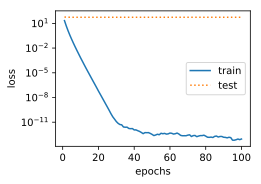

l2 norm of w: 11.611941


In [5]:
fit_and_plot(lambd=0)

### Using Weight Decay

The example below shows that even though the training error increased, 
the error on the test set decreased. 
This is precisely the improvement that we expect from using weight decay. 
While not perfect, overfitting has been mitigated to some extent. 
In addition, the $\ell_2$ norm of the weight $\mathbf{w}$ 
is smaller than without using weight decay.

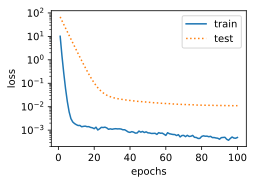

l2 norm of w: 0.04062337


In [6]:
fit_and_plot(lambd=3)

## Concise Implementation

Because weight decay is ubiquitous in neural network optimization,
Gluon makes it especially convenient,
integrating weight decay into the optimization algorithm itself
for easy use in combination with any loss function. 
Moreover, this integration serves a computational benefit,
allowing implementation tricks to add weight decay to the algorithm,
without any additional computational overhead.
Since the weight decay portion of the update 
depdends only on the current value of each parameter,
and the optimizer must to touch each parameter once anyway.

In the following code, we specify 
the weight decay hyper-parameter directly 
through the `wd` parameter when instantiating our `Trainer`. 
By default, Gluon decays both weights and biases simultaneously. 
Note that we can have *different* optimizers 
for different sets of parameters. 
For instance, we can have one `Trainer` 
with weight decay for the weights $\mathbf{w}$ 
and another without weight decay to take care of the bias $b$.

In [7]:
def fit_and_plot_gluon(wd):
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=1))
    loss = gloss.L2Loss()
    # The weight parameter has been decayed. Weight names generally end with
    # "weight".
    trainer_w = gluon.Trainer(net.collect_params('.*weight'), 'sgd',
                              {'learning_rate': lr, 'wd': wd})
    # The bias parameter has not decayed. Bias names generally end with "bias"
    trainer_b = gluon.Trainer(net.collect_params('.*bias'), 'sgd',
                              {'learning_rate': lr})
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            # Call the step function on each of the two Trainer instances to
            # update the weight and bias separately
            trainer_w.step(batch_size)
            trainer_b.step(batch_size)
        train_ls.append(loss(net(train_features),
                             train_labels).mean().asscalar())
        test_ls.append(loss(net(test_features),
                            test_labels).mean().asscalar())
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net[0].weight.data().norm().asscalar())

The plots look just the same as when we implemented weight decay from scratch 
but they run a bit faster and are easier to implement, 
a benefit that will become more pronounced for large problems.

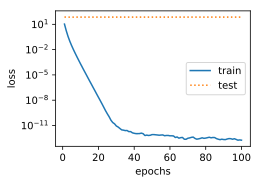

L2 norm of w: 13.311797


In [8]:
fit_and_plot_gluon(0)

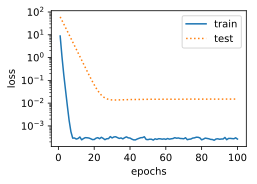

L2 norm of w: 0.033095647


In [9]:
fit_and_plot_gluon(3)

So far, we only touched upon one notion of 
what constitutes a simple *linear* function. 
For nonlinear functions, what constitutes *simplicity* 
can be a far more complex question. 
For instance, there exist [Reproducing Kernel Hilbert Spaces (RKHS)](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space)
which allow one to use many of the tools 
introduced for linear functions in a nonlinear context. 
Unfortunately, RKHS-based algorithms 
do not always scale well to massive amounts of data. 
For the purposes of this book, we limit ourselves 
to simply summing over the weights for different layers, 
e.g. via $\sum_l \|\mathbf{w}_l\|^2$, 
which is equivalent to weight decay applied to all layers.


## Summary

* Regularization is a common method for dealing with overfitting. It adds a penalty term to the loss function on the training set to reduce the complexity of the learned model.
* One particular choice for keeping the model simple is weight decay using an $\ell_2$ penalty. This leads to weight decay in the update steps of the learning algorithm.
* Gluon provides automatic weight decay functionality in the optimizer by setting the hyperparameter `wd`.
* You can have different optimizers within the same training loop, e.g. for different sets of parameters.


## Exercises

1. Experiment with the value of $\lambda$ in the estimation problem in this page. Plot training and test accuracy as a function of $\lambda$. What do you observe?
1. Use a validation set to find the optimal value of $\lambda$. Is it really the optimal value? Does this matter?
1. What would the update equations look like if instead of $\|\mathbf{w}\|^2$ we used $\sum_i |w_i|$ as our penalty of choice (this is called $\ell_1$ regularization).
1. We know that $\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$. Can you find a similar equation for matrices (mathematicians call this the [Frobenius norm](https://en.wikipedia.org/wiki/Matrix_norm#Frobenius_norm))?
1. Review the relationship between training error and generalization error. In addition to weight decay, increased training, and the use of a model of suitable complexity, what other ways can you think of to deal with overfitting?
1. In Bayesian statistics we use the product of prior and likelihood to arrive at a posterior via $p(w|x) \propto p(x|w) p(w)$. How can you identify $p(w)$ with regularization?

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2342)

![](../img/qr_weight-decay.svg)